#### Figure 4A
Run the following Python files: 

- src/ewcsn_classify_test.py 
- src/LWT_ewcsn_classify_test.py 
- src/UWA_ewcsn_classify_test.py 

For the following 9 datasets: \
'Zhang_T', 'Kang_ctrl', 'Zheng68K', 'Baron_human', 'Muraro', 'Segerstolpe', 'AMB', 'TM', 'Baron_mouse' \
Use high-confidence gene interaction data from HumanNet GSP for human datasets and from Alliance of Genome Resources for mouse datasets. Calculate the F1-score and accuracy for different cell types, which will be used to generate Figure 4A and Figure 4B.

/tmp/ipykernel_45802/824853016.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(custom_xtick_labels, fontsize=10, rotation=45, ha='right')


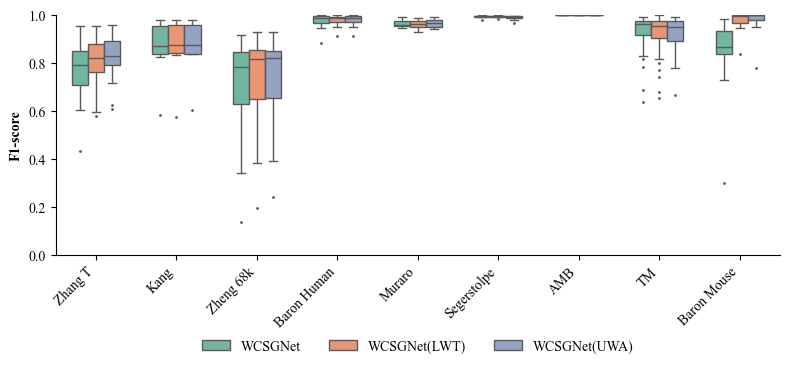

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

def create_grouped_box_plot(data, dataset_order):
    plt.style.use('default')  
    plt.rcParams['font.family'] = 'Times New Roman'
    fig = plt.figure(figsize=(8, 4))

    ax = sns.boxplot(data=data,
                    x='Dataset',
                    y='F1_Score',
                    hue='Method',
                    palette='Set2',
                    order=dataset_order,
                    width=0.6,
                    linewidth=1.0,
                    flierprops={
                        "marker": "o",
                        "markersize": 1,
                        "markerfacecolor": "black"
                    })
    
    plt.xlabel('', fontsize=10, fontweight='bold')
    plt.ylabel('F1-score', fontsize=10, fontweight='bold')

    # Set custom x-axis labels
    custom_xtick_labels = ['Zhang T', 'Kang', 'Zheng 68k', 'Baron Human', 'Muraro', 
                           'Segerstolpe', 'AMB', 'TM', 'Baron Mouse']
    ax.set_xticklabels(custom_xtick_labels, fontsize=10, rotation=45, ha='right')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Add axis lines and remove grid lines
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove the grid
    ax.grid(False)

    # Move legend to bottom
    handles, labels = ax.get_legend_handles_labels()
    # Move legend to bottom with custom labels
    handles, _ = ax.get_legend_handles_labels()
    custom_labels = ['WCSGNet', 'WCSGNet(LWT)', 'WCSGNet(UWA)']    
    ax.get_legend().remove()


    plt.legend(handles, custom_labels,
              loc='upper center',
              bbox_to_anchor=(0.5, -0.3),
              ncol=3,
              fontsize=10,
              frameon=False,
              edgecolor='black')
    
    plt.xlim(-0.5, len(dataset_order) - 0.5)
    plt.ylim(0, 1)
    plt.tight_layout()
    
    return plt

def process_csv_files(directory_path):
    """
    Read all CSV files in the specified directory and combine them into a single DataFrame
    """
    csv_files = glob.glob(os.path.join(directory_path, "*.csv"))
    all_data = []
    
    for file_path in csv_files:
        dataset_name = os.path.basename(file_path).replace('.csv', '')
        df = pd.read_csv(file_path, index_col=0)
        df = df[df.index.notna()]
        melted_df = df.melt(ignore_index=False, 
                           var_name='Method', 
                           value_name='F1_Score')
        melted_df = melted_df.reset_index()
        melted_df.columns = ['Cell_Type', 'Method', 'F1_Score']
        melted_df['Dataset'] = dataset_name
        all_data.append(melted_df)
    
    combined_data = pd.concat(all_data, ignore_index=True)

    dataset_order = ['Zhang_T', 'Kang_ctrl', 'Zheng68K', 'Baron_human', 'Muraro', 'Segerstolpe', 'AMB', 'TM', 'Baron_mouse']
    
    
    return combined_data, dataset_order


# Specify the directory path where the F1 scores for each cell type, 
# obtained using different edge weight representation methods across various datasets, are saved.
directory_path = "data/Figure4A-data-support"

# Process data
combined_data, dataset_order = process_csv_files(directory_path)

# Create and save plot
plt = create_grouped_box_plot(combined_data, dataset_order)

plt.savefig('../../result/Figures/Figure_4A.png', 
            dpi=1200, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none',
            format='png') 

#### Figure 4B

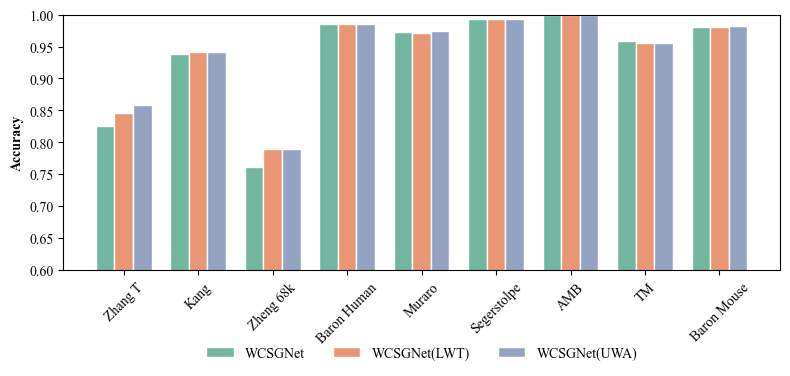

In [1]:
# accuracy
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman'

WCSGNet = [0.825 ,0.939 ,0.761,	0.986 ,	0.973 ,	0.994, 1.000 ,	0.958 ,	0.981 ]  # 9个数据集
WCSGNet_LWT = [0.846 ,	0.941 ,	0.789 ,	0.985 ,	0.971 ,	0.994 ,	1.000 ,	0.956, 	0.981 ]  # 9个数据集
WCSGNet_UWA = [0.858 ,	0.941 ,	0.790 ,	0.986 ,	0.974 ,	0.993 ,	1.000 , 0.956, 	0.983 ]  # 9个数据集

datasets = ["Zhang T", "Kang", "Zheng 68k", "Baron Human", "Muraro", "Segerstolpe", "AMB", "TM", "Baron Mouse"]

x = np.arange(len(datasets)) 
width = 0.25  


plt.figure(figsize=(8, 4))

plt.bar(x - width, WCSGNet, width, label='WCSGNet', color='#72B6A1', edgecolor='white', linewidth=1)
plt.bar(x, WCSGNet_LWT, width, label='WCSGNet(LWT)', color='#E99675', edgecolor='white', linewidth=1)
plt.bar(x + width, WCSGNet_UWA, width, label='WCSGNet(UWA)', color='#95A3C3', edgecolor='white', linewidth=1)

plt.ylabel('Accuracy', fontsize=10, fontweight="bold")
plt.xticks(x, datasets, fontsize=10, rotation=45)  
plt.ylim(0.6, 1.0) 


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fontsize=10, ncol=3, frameon=False)

def add_value_labels(ax):
    for bar in ax.patches:
        height = bar.get_height()


ax = plt.gca()
add_value_labels(ax)

plt.tight_layout()

plt.savefig('../../result/Figures/Figure_4B.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.savefig('../../result/Figures/Figure_4B.png', format='png', dpi=1200, bbox_inches='tight')
plt.show()
